# <center>Case Study</center>
<p>
## <center>Lorenzo di Bari</center> 
<p>
## <center><i>Spatial Ecology</i></center>
<p>
## <center>Jun 2019</center>

## BackGround 
- Geoenviornmental variables 
- Ground observationd : Nitrogen in US streams  

## Code

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RFReg
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

read in data

In [2]:
dsIn = pd.read_csv("../US_TN_season_1_proc.csv")
dsIn.head(6)

,longitude,latitude,mean,std,cv,lc01,lc02,lc03,lc04,lc05,...,hydro16,hydro17,hydro18,hydro19,dem,slope,order,RVunif,bcmean,RVunif_bc
0,-123.240272,45.443739,0.2510,0.1094,0.3501,66,0,1,33,0,...,182937,21313,182937,21313,498,407,2,20.115164,-1.435592,-2.033112
1,-123.195833,45.470833,0.3532,0.0584,0.1666,53,0,2,43,0,...,155202,18107,155202,18107,365,402,2,30.902325,-1.070739,-0.020136
2,-123.183454,46.181221,0.6259,0.1196,0.1854,28,0,15,45,23,...,310689856,136347296,310689856,136347296,1470,492,8,48.924205,-0.474586,-0.257662
3,-123.169589,45.541311,0.4808,0.1551,0.3282,59,0,2,33,0,...,302169,37266,302169,37266,342,467,2,10.955647,-0.747083,0.341342
4,-123.155663,45.458725,0.5596,0.1833,0.3275,52,0,2,43,0,...,167904,19575,167904,19575,341,391,2,48.396582,-0.589795,-0.007340
5,-123.124274,45.474837,0.7127,0.2210,0.3340,46,0,3,33,0,...,470310,55128,470310,55128,315,353,3,50.883960,-0.341834,3.105412


In [3]:
dsIn.columns.values

array(['longitude', 'latitude', 'mean', 'std', 'cv', 'lc01', 'lc02',
       'lc03', 'lc04', 'lc05', 'lc06', 'lc07', 'lc08', 'lc09', 'lc10',
       'lc11', 'lc12', 'prec', 'tmin', 'tmax', 'soil01', 'soil02',
       'soil03', 'soil04', 'soil05', 'soil06', 'soil07', 'soil08',
       'soil09', 'soil10', 'hydro01', 'hydro02', 'hydro03', 'hydro04',
       'hydro05', 'hydro06', 'hydro07', 'hydro08', 'hydro09', 'hydro10',
       'hydro11', 'hydro12', 'hydro13', 'hydro14', 'hydro15', 'hydro16',
       'hydro17', 'hydro18', 'hydro19', 'dem', 'slope', 'order', 'RVunif',
       'bcmean', 'RVunif_bc'], dtype=object)

In [4]:
X = dsIn.iloc[:,5:52].values
Y = dsIn.iloc[:,53:54].values

In [28]:
X.shape

(1118, 47)

In [34]:
Y.shape

(1118, 1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=24)
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)
regressor = RFReg(n_estimators=100, random_state=24)  
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=24, verbose=0,
                      warm_start=False)

In [6]:
dic_pred = {}
dic_pred['train'] = regressor.predict(X_train)
dic_pred['test'] = regressor.predict(X_test)

In [7]:
[pearsonr(dic_pred['train'],y_train)[0],pearsonr(dic_pred['test'],y_test)[0]]

[0.9790625406279887, 0.8027433365286146]

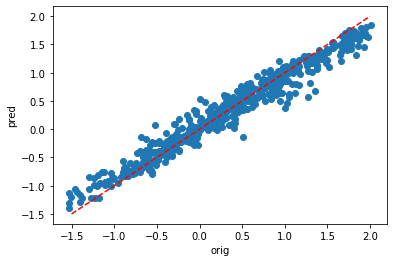

In [8]:
plt.scatter(y_train,dic_pred['train'])
plt.xlabel('orig')
plt.ylabel('pred')
ident = [-1.5, 2]
plt.plot(ident,ident,'r--')

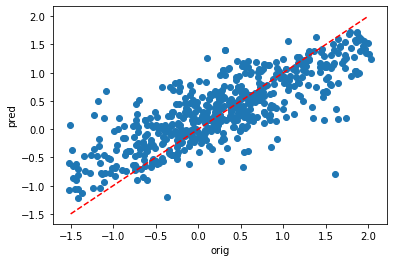

In [9]:
plt.scatter(y_test,dic_pred['test'])
plt.xlabel('orig')
plt.ylabel('pred')
ident = [-1.5, 2]
plt.plot(ident,ident,'r--')